# LibROSAを使って短時間フーリエ変換をしよう

## ライブラリをインポートしよう

In [0]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')

## データを読み込んで可視化しよう

[-0.00888062 -0.01101685 -0.00698853 ... -0.03143311 -0.03579712
 -0.0302124 ]
220500


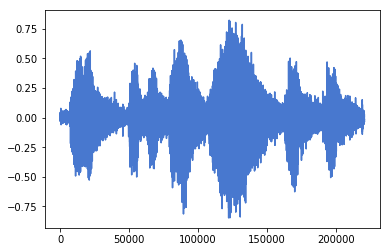

In [0]:
# 波形情報を `y` へ、サンプリングレートを `sr` へ格納
y, sr = librosa.load("/content/drive/My Drive/Colab Notebooks/motorcycle.wav", sr=44100)
print(y)
print(len(y))
# 波形情報を可視化
plt.plot(y)
plt.show()

In [0]:
# テンポとビートを表示
length = librosa.samples_to_time(len(y), sr)
tempo= librosa.beat.beat_track(y=y, sr=sr)
print("音の長さ = {}秒".format(length))
print("テンポ = {}".format(tempo[0])) # 1分間の拍数

音の長さ = 5.0秒
テンポ = 87.5926906779661


## 単時間フーリエ変換(STFT)

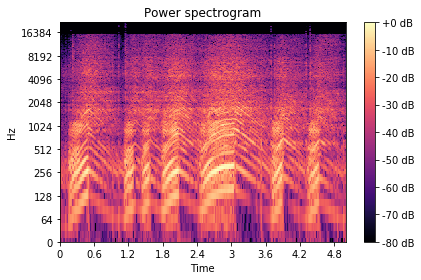

In [0]:
# 短時間フーリエ変換
S = np.abs(librosa.stft(y))

# 画像出力
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', sr=sr)
plt.title("Power spectrogram") # グラフタイトル
plt.colorbar(format="%+2.0f dB") # カラーバーの設定。%+2.0fは小数点以下桁数の設定。%+.1fだと小数点以下桁数1桁
plt.tight_layout() # 複数のグラフのラベルが重ならないように調整
plt.savefig("/content/drive/My Drive/Colab Notebooks/STFT.png") # 画像ファイルとして保存
plt.show()

# LibROSAを使ってMFCCをしよう 

## プログラムをコピーしてMFCCを適用しよう

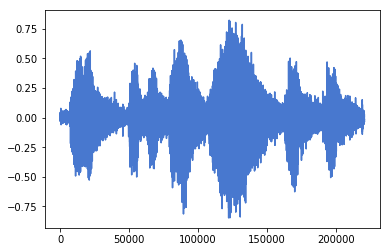

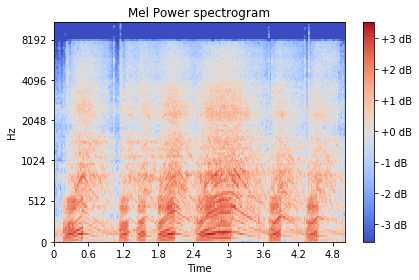

In [0]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
from sklearn import preprocessing

# 波形情報を `y` へ、サンプリングレートを `sr` へ格納
y, sr = librosa.load("/content/drive/My Drive/Colab Notebooks/motorcycle.wav", sr=44100)
# 波形情報を可視化
plt.plot(y)
plt.show()

# MFCC
def calculate_mfcc(x):
    stft = np.abs(librosa.stft(x))**2 
    log_stft = librosa.power_to_db(stft) # パワースペクトログラムをdbに変換
    melsp = librosa.feature.melspectrogram(S=log_stft) # メル尺度スペクトログラムを計算
    mfcc = librosa.feature.mfcc(S=melsp) # メル周波数ケプストラム係数の計算
    mfcc = preprocessing.scale(melsp, axis=1) # 標準化
    return melsp

# MFCCの計算
mfcc = calculate_mfcc(y)

# 画像出力
librosa.display.specshow(mfcc, y_axis='mel', x_axis='time', sr=sr)
plt.title('Mel Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/MFCC.png')
plt.show()


# 音声データの前処理について学ぼう

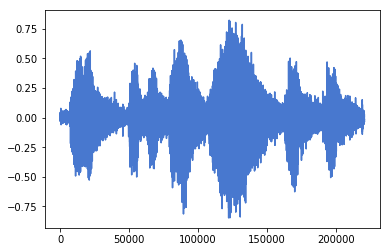

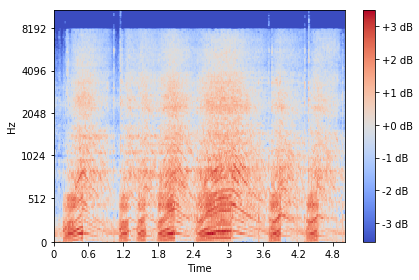

In [0]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
from sklearn import preprocessing

# MFCC
def calculate_mfcc(x):
    stft = np.abs(librosa.stft(x))**2 
    log_stft = librosa.power_to_db(stft) # パワースペクトログラムをdbに変換
    melsp = librosa.feature.melspectrogram(S=log_stft) # メル尺度スペクトログラムを計算
    mfcc = librosa.feature.mfcc(S=melsp) # メル周波数ケプストラム係数の計算
    mfcc = preprocessing.scale(melsp, axis=1) # 標準化
    return melsp

# 波形のビジュアライズ用
def show_wave(x, name):
    plt.plot(x)
    plt.savefig("/content/drive/My Drive/Colab Notebooks/{}_wave.png".format(name))
    plt.show()

# MFCCの結果をヒートマップ表示用
def show_mfcc(mfcc, sr, name):
    librosa.display.specshow(mfcc, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+02.0f dB') # カラーバー描画
    plt.tight_layout()  # 図のコンパクト化
    plt.savefig("/content/drive/My Drive/Colab Notebooks/{}_mfcc.png".format(name))
    plt.show()

# データインポート
y, sr = librosa.load("/content/drive/My Drive/Colab Notebooks/motorcycle.wav", sr=44100)
mfcc = calculate_mfcc(y)
show_wave(y, name="data")
show_mfcc(mfcc, sr=sr, name="data")


## ホワイトノイズを追加しよう

ADD WHITE NOISE


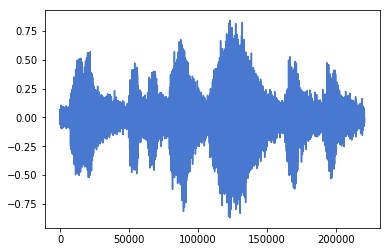

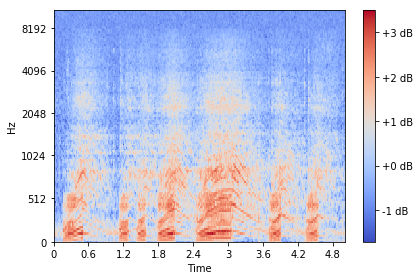

In [0]:
# data augmentation: ホワイトノイズを追加
def add_white_noise(x, rate=0.005):
    R = np.random.randn(len(x))
    return x + rate *  R # 標準正規分布の乱数を発生

print("ADD WHITE NOISE")
y_wn = add_white_noise(y, 0.02)
mfcc = calculate_mfcc(y_wn)
show_wave(y_wn, name="White_noise")
show_mfcc(mfcc, sr=sr, name="White_noise")

## タイムシフトを追加しよう

SHIFT SOUND


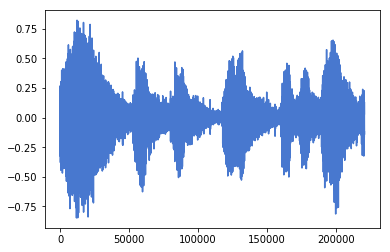

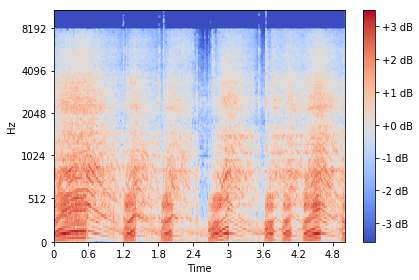

In [0]:
# data augmentation: タイムフレームでシフト
def shift_sound(x, rate=2):
    return np.roll(x, int(len(x)//rate)) #シフト量を設定

print("SHIFT SOUND")
y_ss = shift_sound(y, 2)
mfcc = calculate_mfcc(y_ss)
show_wave(y_ss, "shift")
show_mfcc(mfcc, sr, "shift")

librosa.output.write_wav("/content/drive/My Drive/Colab Notebooks/shift.wav", y_ss, sr=sr)

## 音をのばそう

STRETCH SOUND


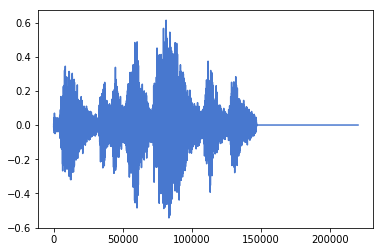

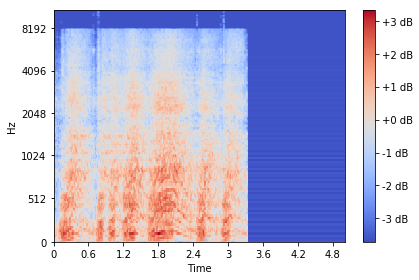

In [0]:
# data augmentation: 音をのばす
def stretch_sound(x, rate=1.1):  # rateを増やすと早送り
    input_length = len(x)
    x = librosa.effects.time_stretch(x, rate)
    if len(x)>input_length:
        return x[:input_length]
    else:
        max_val = max(0, input_length - len(x))
        return np.pad(x, (0, max_val), "constant")

print("STRETCH SOUND")
y_st = stretch_sound(y, 0.5)
mfcc = calculate_mfcc(y_st)
show_wave(y_st, "stretch")
show_mfcc(mfcc, sr, "stretch")

librosa.output.write_wav("/content/drive/My Drive/Colab Notebooks/stretch.wav", y_st, sr=sr)